In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
file = pd.read_csv("wine.csv")
file.head()

,fixed acidity,volatile acidity,pressure,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,volatality while in solution,sulphates,alcohol,quality,citric,pH
0,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.51,0.56,9.4,5,<0.5,<3
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,<0.5,>=3
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,<0.5,>=3
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,>=0.5,>=3
4,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.30,0.56,9.4,5,<0.5,<3


In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
fixed acidity                   1599 non-null float64
volatile acidity                1599 non-null float64
pressure                        1599 non-null object
residual sugar                  1599 non-null object
chlorides                       1599 non-null object
free sulfur dioxide             1599 non-null object
total sulfur dioxide            1599 non-null object
density                         1599 non-null object
volatality while in solution    1599 non-null float64
sulphates                       1599 non-null object
alcohol                         1599 non-null float64
quality                         1599 non-null int64
citric                          1599 non-null object
pH                              1599 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 175.0+ KB


In [23]:
file.isnull().sum()

fixed acidity                   0
volatile acidity                0
pressure                        0
residual sugar                  0
chlorides                       0
free sulfur dioxide             0
total sulfur dioxide            0
density                         0
volatality while in solution    0
sulphates                       0
alcohol                         0
quality                         0
citric                          0
pH                              0
dtype: int64

In [ ]:
file[]


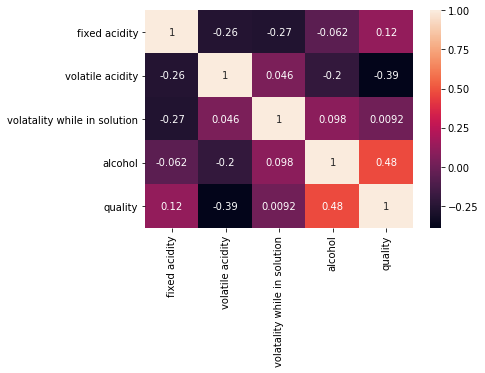

In [18]:

corr = file.corr()

ticks = np.arange(0,len(file.columns),1)
# plot the heatmap
sns.heatmap(corr,annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [8]:
x = file.iloc[:,[0]].values
y = file.iloc[:,1].values

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

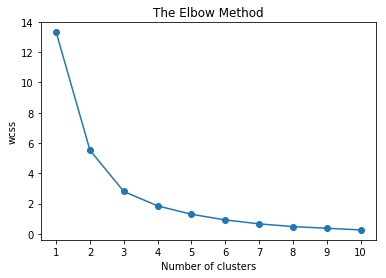

In [10]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.xticks(np.arange(1,11,step=1))
plt.title("The Elbow Method")
plt.show()

### Optimal number of clusters is 4


### Splitting the dataset into training and test 

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0 )

### Applying K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters = 4,init="k-means++",random_state=0)

kmeans.fit(x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
y_kmeans = kmeans.predict(x_test)

### Visualizing the clusters

In [14]:
plt.scatter(x_test[y_kmeans==0, 0], x_test[y_kmeans==0, 1], s=80, c='red', label="Cluster 1")
plt.scatter(x_test[y_kmeans==1, 0], x_test[y_kmeans==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(x_test[y_kmeans==2, 0], x_test[y_kmeans==2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(x_test[y_kmeans==3, 0], x_test[y_kmeans==3, 1], s=100, c='black', label="Cluster 4")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,marker='d', c='magenta', label="Centroids")
plt.xlabel("pH")
plt.ylabel("Wine Class")
plt.legend(loc=1)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1